# Project 1 - MTA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


## 1. Looking at Public MTA dataset

Below we read a week's worth of turnstile dataset for MTA subway system in NYC.

In [2]:
data = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190330.txt")

In [3]:
data.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,00:00:00,REGULAR,6989774,2370411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,04:00:00,REGULAR,6989795,2370413
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,08:00:00,REGULAR,6989813,2370436
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,12:00:00,REGULAR,6989924,2370512
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,16:00:00,REGULAR,6990200,2370573


According to the MTA website, the features shown are defined as:

- C/A      = Control Area (A002)
- UNIT     = Remote Unit for a station (R051)
- SCP      = Subunit Channel Position represents an specific address for a device (02-00-00)
- STATION  = Represents the station name the device is located at
- LINENAME = Represents all train lines that can be boarded at this station. Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.
- DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND   
- DATE     = Represents the date (MM-DD-YY)
- TIME     = Represents the time (hh:mm:ss) for a scheduled audit event
- DESc     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
    1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
    2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 
- ENTRIES  = The comulative entry register value for a device
- EXIST    = The cumulative exit register value for a device

The key motive of data exploration in this particular set is to look for some of the more popular stations. We can achieve that by looking at how many passengers use a specific turnstile, or a device located at one (ENTRIES accumulation). Looking at one specific device, we notice a weird trend:

In [4]:
data[(data["STATION"]=="116 ST") & (data["SCP"]=="01-00-01") & (data["C/A"]=='R257') & (data["UNIT"]=='R182')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
165195,R257,R182,01-00-01,116 ST,6,IRT,03/23/2019,01:00:00,REGULAR,87382,49306
165196,R257,R182,01-00-01,116 ST,6,IRT,03/23/2019,05:00:00,REGULAR,87402,49317
165197,R257,R182,01-00-01,116 ST,6,IRT,03/23/2019,09:00:00,REGULAR,87451,49337
165198,R257,R182,01-00-01,116 ST,6,IRT,03/23/2019,13:00:00,REGULAR,87555,49390
165199,R257,R182,01-00-01,116 ST,6,IRT,03/23/2019,17:00:00,REGULAR,87768,49480
165200,R257,R182,01-00-01,116 ST,6,IRT,03/23/2019,21:00:00,REGULAR,87971,49589
165201,R257,R182,01-00-01,116 ST,6,IRT,03/24/2019,01:00:00,REGULAR,88037,49648
165202,R257,R182,01-00-01,116 ST,6,IRT,03/24/2019,05:00:00,REGULAR,88049,49669
165203,R257,R182,01-00-01,116 ST,6,IRT,03/24/2019,09:00:00,REGULAR,88077,49682
165204,R257,R182,01-00-01,116 ST,6,IRT,03/24/2019,17:00:00,REGULAR,88352,49811


At a certain point in time (around March 29th after 5am), the ENTRIES count jumps up significantly. Considering that there are 13 million people in NYC, it is impossible to have a 4 hour window where more than all of NYC population passes through a single turnstile in a subway station. We can attribute these to unforseen event such as device malfunction, device reset setting entries accumulation at random number, etc.

While many devices do not have this problem, and therefore total number of entries can be calculated, the devices with these problems must be identified. In order to do so, **we are iterating over the whole data, comparing diff between the two entries, and if it is greater than literature value (20 people per min \* 60 per hour \* 4 hours = 4800 per 4 hours), then we flag the station device number.**

Notes:

1. We add a new feature called DATETIME - It's a DATETIME element of the DATE and TIME given (used to price hour calculations)
2. We want to make sure all consecutive audit events are for the same device

In [5]:
data["DATETIME"]=data["DATE"]+' '+data["TIME"]
data["DATETIME"]=pd.to_datetime(data["DATETIME"])
data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,00:00:00,REGULAR,6989774,2370411,2019-03-23 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,04:00:00,REGULAR,6989795,2370413,2019-03-23 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,08:00:00,REGULAR,6989813,2370436,2019-03-23 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,12:00:00,REGULAR,6989924,2370512,2019-03-23 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,16:00:00,REGULAR,6990200,2370573,2019-03-23 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,20:00:00,REGULAR,6990562,2370623,2019-03-23 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/24/2019,00:00:00,REGULAR,6990734,2370648,2019-03-24 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/24/2019,04:00:00,REGULAR,6990758,2370653,2019-03-24 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/24/2019,08:00:00,REGULAR,6990772,2370676,2019-03-24 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/24/2019,12:00:00,REGULAR,6990860,2370731,2019-03-24 12:00:00


## Step 1: Separate out devices with large jumps in entry values

In [6]:
MAX_PEOPLE = 400000

data_entries=data.groupby(['STATION','C/A','UNIT','SCP']).ENTRIES.agg(['max','min'])
data_entries["diff"] = data_entries["max"]-data_entries["min"]
jumps = data_entries[data_entries["diff"] > MAX_PEOPLE].reset_index()
rest = data_entries[data_entries["diff"] <= MAX_PEOPLE]

In [7]:
print(len(data_entries),len(jumps),len(rest))

4849 14 4835


In [8]:
jumps.head(5)

,STATION,C/A,UNIT,SCP,max,min,diff
0,116 ST,R257,R182,01-00-01,16797438,87382,16710056
1,121 ST,J037,R009,00-06-00,1265285,458808,806477
2,14 ST-UNION SQ,R221,R170,01-00-01,9643166,25,9643141
3,B'WAY-LAFAYETTE,N519,R461,00-03-01,18107911,7781245,10326666
4,CANARSIE-ROCKAW,H041,R152,00-06-00,33613764,184679,33429085


In [48]:
a=list(jumps["STATION"])
b=list(jumps["C/A"])
c=list(jumps["UNIT"])
d=list(jumps["SCP"])

flag=(data["STATION"].isin(a))&(data["C/A"].isin(b))&(data["UNIT"].isin(c))&(data["SCP"].isin(d))


data_jumps = data[flag]
data_not_jumps = data[~flag]

202966

## Step 2: Separate out devices with entry values declining over time

In [14]:
data_not_jumps.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,00:00:00,REGULAR,6989774,2370411,2019-03-23 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,04:00:00,REGULAR,6989795,2370413,2019-03-23 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,08:00:00,REGULAR,6989813,2370436,2019-03-23 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,12:00:00,REGULAR,6989924,2370512,2019-03-23 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,16:00:00,REGULAR,6990200,2370573,2019-03-23 16:00:00


In [11]:
CA_INDEX = 0
UNIT_INDEX = 1
SCP_INDEX = 2
STATION_INDEX = 3
ENTRY_INDEX = 9
DATETIME_INDEX = 11
NEGATIVE_LIST=[]

for i in range(len(data_not_jumps.index)-1):
    
    entry_1 = data_not_jumps.iloc[i,ENTRY_INDEX]
    entry_2 = data_not_jumps.iloc[i+1,ENTRY_INDEX]
    time_1 = data_not_jumps.iloc[i,DATETIME_INDEX]
    time_2 = data_not_jumps.iloc[i+1,DATETIME_INDEX]
    CA1 = data_not_jumps.iloc[i,CA_INDEX]
    CA2 = data_not_jumps.iloc[i+1,CA_INDEX]
    UNIT1 = data_not_jumps.iloc[i,UNIT_INDEX]
    UNIT2 = data_not_jumps.iloc[i+1,UNIT_INDEX]
    SCP1 = data_not_jumps.iloc[i,SCP_INDEX]
    SCP2 = data_not_jumps.iloc[i+1,SCP_INDEX]
    
    
    if (CA1==CA2) & (SCP1==SCP2) & (UNIT1==UNIT2): # if the two entries are of the same device
        # If the 2nd entry-1st entry is negative
        if (entry_2-entry_1)<0:
            NEGATIVE_LIST.append([CA1,UNIT1,SCP1])

In [46]:
len((NEGATIVE_LIST))
neg_set = set(map(tuple,NEGATIVE_LIST))  #need to convert the inner lists to tuples so they are hashable
neg_list=list(neg_set)
type(neg_list)

neg_list=(pd.DataFrame(neg_list,columns=["C/A","UNIT","SCP"]))
len(neg_list)

71

In [29]:
a2=list(neg_list["C/A"])
b2=list(neg_list["UNIT"])
c2=list(neg_list["SCP"])

flag2=(data_not_jumps["C/A"].isin(a2))&(data_not_jumps["UNIT"].isin(b2))&(data["SCP"].isin(c2))
data_good = data_not_jumps[~flag2]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [30]:
len(data_good)

189097

In [31]:
len(data_not_jumps)

202966

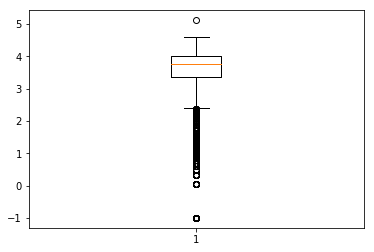

In [32]:
data_good_entries=data_good.groupby(['STATION','C/A','UNIT','SCP']).ENTRIES.agg(['max','min'])
data_good_entries["diff"] = data_good_entries["max"]-data_good_entries["min"]
k = np.log10(data_good_entries["diff"]+0.1)
plt.boxplot(k);

In [47]:
len(data_good_entries.sort_values("diff",ascending=False))

4482

In [ ]:
data_entries